<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Créer-la-ressource-Azure-Cognitive-Services" data-toc-modified-id="Créer-la-ressource-Azure-Cognitive-Services-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Créer la ressource Azure Cognitive Services</a></span></li><li><span><a href="#Importation-des-librairies-et-des-variables" data-toc-modified-id="Importation-des-librairies-et-des-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importation des librairies et des variables</a></span><ul class="toc-item"><li><span><a href="#Importation-des-librairies" data-toc-modified-id="Importation-des-librairies-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importation des librairies</a></span></li><li><span><a href="#Importation-des-variables-d'environnement" data-toc-modified-id="Importation-des-variables-d'environnement-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Importation des variables d'environnement</a></span></li><li><span><a href="#Les-paramètres-pour-l'appel-de-l'api" data-toc-modified-id="Les-paramètres-pour-l'appel-de-l'api-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Les paramètres pour l'appel de l'api</a></span></li></ul></li><li><span><a href="#Requêtes" data-toc-modified-id="Requêtes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Requêtes</a></span><ul class="toc-item"><li><span><a href="#Requête-pour-une-phrase-d'exemple" data-toc-modified-id="Requête-pour-une-phrase-d'exemple-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Requête pour une phrase d'exemple</a></span></li><li><span><a href="#Requête-à-partir-d'une-liste" data-toc-modified-id="Requête-à-partir-d'une-liste-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Requête à partir d'une liste</a></span></li></ul></li><li><span><a href="#Requête-à-partir-d'une-base-de-données" data-toc-modified-id="Requête-à-partir-d'une-base-de-données-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Requête à partir d'une base de données</a></span><ul class="toc-item"><li><span><a href="#Création-d'une-base-de-données-textes/labels" data-toc-modified-id="Création-d'une-base-de-données-textes/labels-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Création d'une base de données textes/labels</a></span></li><li><span><a href="#Requête-à-partir-de-la-base-de-données" data-toc-modified-id="Requête-à-partir-de-la-base-de-données-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Requête à partir de la base de données</a></span></li></ul></li><li><span><a href="#Sources-et-inspirations" data-toc-modified-id="Sources-et-inspirations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sources et inspirations</a></span></li></ul></div>

Ce notebook permet l'utilisation du service de détection d'**Azure Cognitive Services, Text Analytics.**

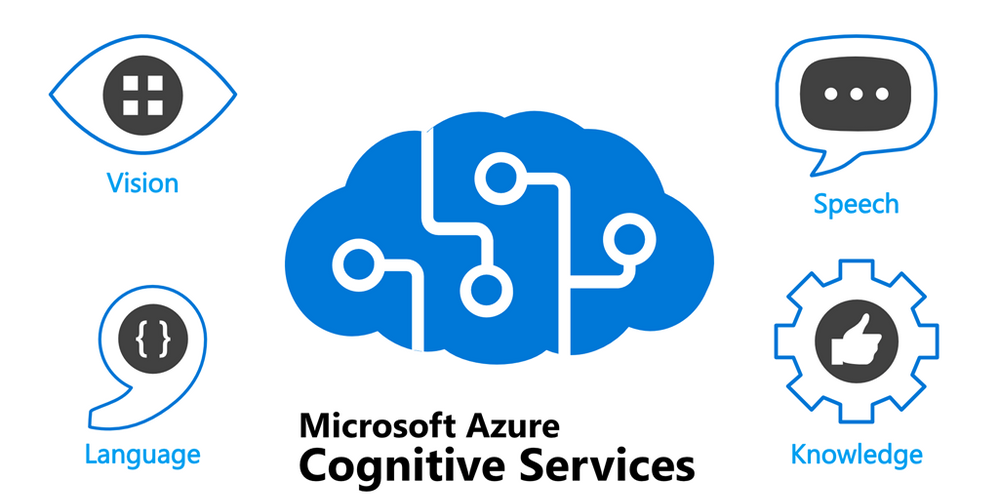

# Créer la ressource Azure Cognitive Services

Sources :
    
- https://azure.microsoft.com/fr-fr/services/cognitive-services/
- https://docs.microsoft.com/en-us/azure/cognitive-services/language-service/language-detection/overview
- https://techcommunity.microsoft.com/t5/ai-cognitive-services-blog/introducing-azure-cognitive-service-for-language/ba-p/2910735

# Importation des librairies et des variables

## Importation des librairies

In [1]:
import pandas as pd  # Une année de pandas équivaut à trois années humaines

import os
from dotenv import load_dotenv  # Pour récupérer les variables d'environnement

import mespackages.Mystique_Raven.my_detection as mpmd  # Importe les fonctions de détection utiles à ce notebook

## Importation des variables d'environnement

Les identifiants et clés de connexion sont disponibles dans un fichier .env.

In [2]:
load_dotenv('api.env')  # Importation des variables d'environnement

# Récupération des variables d'environnement
location = os.environ['YOUR_RESOURCE_LOCATION']
key = os.environ['YOUR_SUBSCRIPTION_KEY']
endpoint = os.environ['YOUR_ENDPOINT']

## Les paramètres pour l'appel de l'api

In [3]:
''' Cette fonction permet l'authentification au service Azure Text Analytics de notre groupe de ressource
Entrées : 
- key : clé d'authentification au service Azure Language
- endpoint : point de terminaison https://XXXXXXXX.cognitiveservices.azure.com/

Renvoie :
- text_analytics_client : objet TextAnalyticsClient
'''
# Authentification du client grâce à la clé et au point de terminaison
client = mpmd.authenticate_client(key, endpoint)


*Fonction by Sandy M.*

# Requêtes

## Requête pour une phrase d'exemple

In [4]:
phrase = ["Ce document est rédigé en Français."]

In [5]:
''' Cette fonction permet d'afficher la langue d'une phrase
Entrées : 
- client : objet TextAnalyticsClient
- phrase : texte, (must be valid UTF-8 encoded string)

Affiche : 
- le texte en entrée
- la langue détectée
- le score de confiance établi par l'algorithme de détection
'''
# Affichage de la réponse à la détection de la langue d'un texte
mpmd.language_detection_example(client, phrase)


*Fonction by Sandy M.*

Pour le texte:  " Ce document est rédigé en Français. " :
 la langue détectée est :  French  
 avec un score de confiance de : 1.0


## Requête à partir d'une liste

In [6]:
texte = [
    [
        'Zvi Zamir (Hebrew: צבי זמיר‎) born Zvicka Zarzevsky (born 1925) was a major general in the Israel Defense Forces and the Director of the Mossad from 1968 to 1974. Born in Poland, Zamir immigrated with his family to the then British Mandate of Palestine when only seven months old. At the age of 18 Zamir began his military career, first as a soldier in the Haganahs Palmach, a unit that included future Israeli leaders among the likes of Moshe Dayan and Yitzhak Rabin. During the 1948 Arab–Israeli War, Zamir fought in the newly created Israel Defense Forces. After the war he continued climbing the chain of command, eventually promoted to the Commander of the Southern Command. His final IDF post before being appointed Mossad Director came in 1966 when he was appointed the military attaché to London.'
    ],
    [
        'Texas A&M hired Kennedy in May 2011 after Mark Turgeon left for the Maryland head coaching job. Kennedy previously coached at A&M from 1990-91. Kennedy stated at the press conference that A&M is his destination job and he plans to retire there. He was given the honors of SEC Mens Basketball Coach of the Year in 2016.'
    ],
    [
        'Philip Johnson architectural drawings, 1943-1994 (bulk 1943-1970).Held by the Department of Drawings & Archives, Avery Architectural & Fine Arts Library, Columbia University.'
    ],
    [
        'AVCO Embassy Pictures, the films financial backer, preferred either Charles Bronson or Tommy Lee Jones to play the role of Snake Plissken to Carpenters choice of Kurt Russell, who was trying to overcome the "lightweight" screen image conveyed by his roles in several Disney comedies. Carpenter refused to cast Bronson on the grounds that he was too old, and because he worried that he could lose directorial control over the picture with an experienced actor. At the time, Russell described his character as "a mercenary, and his style of fighting is a combination of Bruce Lee, The Exterminator, and Darth Vader, with Eastwoods vocal-ness." All that matters to Snake, according to the actor, is the next 60 seconds. Living for exactly that next minute is all there is. Russell used a rigorous diet and exercise program in order to develop a lean and muscular build. He also endeavored to stay in character between takes and throughout the shooting, as he welcomed the opportunity to get away from the Disney comedies he had done previously. He did find it necessary to remove the eyepatch between takes, as wearing it constantly seriously affected his depth perception.'
    ],
    [
        'Ilex mucronata, formerly the type species of Nemopanthus, is native to eastern North America. Nemopanthus was treated as a separate genus with eight species. of the family Aquifoliaceae, now transferred to Ilex on molecular data; it is closely related to Ilex amelanchier.'
    ],
    [
        '詹姆森一星期在博物馆给学生上3次实践课，讲解包括矿物在内的各种展品，达尔文在课上学到了岩层排序的知识。他经常出入博物馆，浏览和制作鸟类标本。邓肯的医学课介绍了瑞士植物学家奥古斯丁·彼拉姆斯·德堪多的“自然体系”，它强调物种之间的竞争。达尔文对医学的厌恶不断增长，他不断给家里写信询问情况，最终于1827年4月24日離开了学校，没有获得学位。5月他到了伦敦拜访卡罗琳，之后又与乔赛亚舅舅一道去了法国巴黎，7月时回到了家乡。9月1日，狩猎季节开始了，查尔斯开始和威廉·莫斯廷·欧文家的女儿范妮交往。在梅尔庄园，他还认识了国会议员詹姆斯·麦金托什爵士。他对于职业规划仍然没有什么概念，父亲已经为他选好了去处——英国国教会。因此，这期间他也研读了皮尔森主教的《信仰说明》、约翰·伯德·萨姆纳牧师的《基督教之证》和其他一些宗教著作。10月15日，他被录取为基督学院的自费生。在接下来的时间里他投身于对古典文化的温习之中，1828年伊始才与哥哥结伴奔赴剑桥。'
    ],
    [
        '北京四中是中国最早实行分层教学的学校之一，它根据每个学生的不同特点有针对性地打乱班级上课。每年有百余人次在市区以上的数学、物理、化学、生物和计算机竞赛中获奖。在国际奥林匹克学科竞赛中，共获得六枚金牌、两枚银牌、一枚铜牌。北京四中是北京的重点中学，其文科和理科的高考平均分在北京数一数二，且经常产生高考头名，有95%以上的学生可以进入重点大学，1994年至2002年期间，每年有40％以上的毕业生升入北京大学和清华大学两所高校，比例居全国第一，至今这一数字稳定在每年五分之一（一百人）左右，另有更多的毕业生升入南京大学、上海交通大学、复旦大学、浙江大学和中国科技大学等国内名校以及香港大学、香港科技大学和香港中文大学等香港名校。'
    ],
    [
        '顺天中学堂选址于位于京师后库（现北京市西城区后库）的宛平高等小学堂。校园虽经多次翻新、重建，地址未曾改变。全校占地面积为98.6亩，体育场占地40.6亩，包括篮球场，网球场，排球场和足球场。校园内有树木1500余株，花卉100余种。校园南院有植物园地，种有农作物，并建有一个古朴的井亭，颇有田园意境。如当时校歌所描述的：“半似乡村半似城，花木苍翠四时荣”。'
    ],
    [
        '因为自己研究和开发能力不够，脚本小子通常使用网上能够下载到的攻击程序。常见的这种软件有WinNuke、Back Orifice、NetBus、Sub7、Metasploit、ProRat、SQLmap、Havij。稍微有一点经验的脚本小子，可能使用别人发现的安全漏洞的概念证明代码，来编辑成程序。'
    ],
    [
        '第二張單曲後續曲〈Fighter〉於2月2日開始宣傳活動。2月17日宣布成為樂天世界新款冰淇淋的廣告模特，23日媒體報導這是SS501自出道接下首支「elite」校園服飾兩億五千萬為期六個月的代言，流行品牌「MIGHTY MAC」以及金賢重手機品牌三星Anycall個人代言後第四個代言的項目。原於2月27日在水原市八達區仁溪洞修練Homeplus舉行校服簽名會，因現場秩序失控導致被迫取消。之後因成員許永生喉部腫瘤需開刀治療與隊長金賢重接受角膜切割激光矯視手術而將原定於3月12日展開的首場國內巡迴演唱會延後。'
    ],
    [
        'उद्यान आभा तूफ़ान एक्स्प्रेस 3007 भारतीय रेल द्वारा संचालित एक मेल एक्स्प्रेस ट्रेन है। यह ट्रेन हावड़ा जंक्शन रेलवे स्टेशन (स्टेशन कोड:HWH) से 09:45AM बजे छूटती है और मुग़ल सराय जंक्शन रेलवे स्टेशन (स्टेशन कोड:MGS) पर 02:15AM बजे पहुंचती है। इसकी यात्रा अवधि है 16 घंटे 30 मिनट।'
    ],
    [
        'ज्ञानेन्द्रियों द्वारा बालक यह तो जान लेता है कि अमुक वस्तु कैसी है किन्तु वह यह नहीं जानता कि वह ऐसी क्यों है। बार-बार निरीक्षण व परीक्षण से वह इन कारणों को भी जान जाता है। अर्थात् वह अनुभव से तर्क की ओर बढ़ता है। बालक के अनुभूत तथ्यों को आधार बनाकर धीरे-धीरे निरीक्षण व परीक्षण द्वारा उनकी तर्कशक्ति का विकास करने का प्रयत्न करना चाहिये।'
    ],
    [
        'राष्ट्रीय स्वयंसेवक संघ के ऐसे अनेक कार्यकर्ता हैं जिन्होंने पंडित जी के साथ अनेक अवसरों पर कार्य किया, उनमें प्रमुख हैं केदारनाथ साहनी, विजय कुमार मल्होत्रा, जगदीश अबरोल, बलराज मधोक, श्यामलाल शर्मा, दुर्गा दास वर्मा, चमन लाल गुप्ता, सहदेव सिंह, राजेन्द्र सिंह, मुलख राज परगाल और गोपाल सच्चर।'
    ],
    [
        'तमाम अपीलों व दलीलों के बावजूद सरकार टस से मस न हुई और अन्तत: राजेन्द्रनाथ लाहिड़ी, पण्डित राम प्रसाद बिस्मिल,अशफाक उल्ला खाँ तथा ठाकुर रोशन सिंह- एक साथ चार व्यक्तियों को फाँसी की सजा सुना दी गयी। लाहिड़ी को अन्य क्रान्तिकारियों से दो दिन पूर्व १७ दिसम्बर को ही फाँसी दे दी गयी।'
    ],
    [
        'मस्तिष्क में बाहर की ओर धूसर भाग तथा अंदर की ओर श्वेत भाग रहता है तथा ठीक इससे उल्टा मेरु में रहता है। मस्तिष्क का धूसर भाग सीताओं के द्वारा कई सिलवटों से युक्त रहता है। इस धूसर भाग में ही तंत्रिका कोशिकाएँ रहती हैं तथा श्वेत भाग संयोजक ऊतक का होता है। तंत्रिकाएँ दो प्रकार की होती हैं : (1) प्रेरक (Motor) तथा (2) संवेदी (Sensory)।'
    ],
    [
        'Su resultado más destacado de la temporada llegó en la Ruta del Sur, en el que logró un buen 7.º puesto en la general, además de ser 4.º en su etapa reina entre Bagnères-de-Bigorre y Val-Louron y 15.º en la etapa de Saint-Gaudens a Castres. También obtuvo un 12.º puesto en la etapa reina del Dauphiné Liberé acabada en el Col du Béal. Sorprendentemente se quedó fuera del equipo del Tour de Francia en el que se veía como un buen complemento a Thibaut Pinot.'
    ],
    [
        'Mayoritariamente la población caldense es mestiza y blanca, los pueblos y asentamientos indígenas ocupan el segundo lugar y por último las comunidades afro descendientes.'
    ],
    [
        'La tarjeta de fidelización o fidelidad, que también se conoce como tarjeta de beneficios y descuentos o tarjeta de puntos, es el soporte físico de programas que ofrecen bonificaciones (descuentos, premios etc.) al titular cuando consume productos de la empresa emisora de la tarjeta.'
    ],
    [
        'Impresionado con los buenos informes de Pardo, Menéndez ordenó una segunda expedición. El 1 de septiembre de 1567, Pardo partió de nuevo, llevando aproximadamente entre 90 y 120 hombres, en siguiendo el valle de Catawba y las montañas de Carolina del Norte —y esta vez en Tennessee— en busca de un camino seguro hasta las minas de plata de Zacatecas. Durante el viaje, fueron alimentados por los indios que había almacenados maíz exclusivamente para los españoles. Antes de regresar a Jaora, Pardo se reunió con Guatari Mico y Orata Chiquini, dos caciques femeninas. Después de una corta estancia en Jaora, en el fuerte San Juan —donde supo que los nativos estaban disgustados por las demandas de comida, mujeres y canoas de los españoles así como por la introducción de nuevas enfermedades— Pardo se dirigió hacia las montañas para ayudar a Moyano. Los españoles se detuvieron en Tacoe (cerca de Asheville) y en Cauchi (cerca de Marshall) antes de viajar hacia el este de Tennessee, donde se encontró con Moyano y sus hombres que estaban encerrados en un fuerte, pero ilesos. Más tarde viajando a través de las Grandes Montañas Humeantes (Great Smoky Mountains), Pardo, debido a un informe de un indio amistoso, evitó un ataque por sorpresa y decidió regresar a Santa Elena. En el regreso, Pardo y sus hombres construyeron dos fuertes más. La segunda expedición terminó el 2 de marzo 1568, cuando los españoles llegaron a Santa Elena.'
    ],
    [
        'La ciudad ocupa una estrecha franja de tierra a lo largo de la costa oriental de la bahía de Manila. Navotas está situada al norte de Manila, al oeste de Malabón, y al sur de Obando en Bulacan.'
    ],
    [
        'قبل عام بالضبط وبتاريخ 21/7/2012 أعلن البغدادي خطة هدم الأسوار وبتاريخ 21/7/2013 هاجمت داعش سجنين في بغداد هما سجن التاجي وسجن بغداد المركزي. ونجحت في تهريب أكثر من 1000 معتقل .'
    ],
    [
        'وعندما وصل جنود الحملة الفرنسية غرب مدينة الإسكندرية في 2 يوليو عام 1798 زحفوا على المدينة واحتلوها بعد مقاومة من جانب أهلها وحاكمها محمد كريم دامت ساعات. وبعد ذلك أخذ نابليون يزحف على القاهرة بطريق دمنهور، حيث استطاع الفرنسيون احتلال مدينة رشيد في 6 يوليو ووصلوا إلى الرحمانية وهي قرية على النيل وفي تلك الأثناء، كان المماليك يعدون جيشاً لمقاومة الجيوش الفرنسية بقيادة مراد بك حيث التقى الجيشان بالقرب من شبراخيت في 13 يوليو إلا أن الجيوش المملوكية هُزِمَت واضطرت إلى التقهقر فرجع مراد بك إلى القاهرة.'
    ],
    [
        'كان بصوته الشجي المميز خطيباً مميزاً وصاحب مدرسة وطور قلّ أن تجد له مثيلا. وقد عرف الشيخ حسن زين الدين في خطابته بالإخلاص في القراءة والالتزام في الطرح الخاص في فن الخطابة الحسينية حيث إلهاب العواطف ومخاطبة العقل في نفس الوقت. فكان يعطي مصائب أهل البيت من وقت القراءة الكثير وكذلك الالتزام بالسيرة العامة لأهل البيت، والاهتمام بالجانب العقائدي والفقهي العام. ومن مميزات خطابته التحقيق التاريخي والإلمام بسير أهل البيت وتفاصيل الأحداث التي رافقت حياتهم المقدسة، وكان بحراً زاخراً من المعرفة بالتاريخ الإسلامي وأحوال العرب قبل الإسلام. من هنا فإن الشيخ حسن قد حاز على الشهرة في هذا المجال لأنه استطاع أن يستخدم المنبر الحسيني في الإرشاد والتوعية الإسلامية وربط المجتمع بفكر أهل البيت عليهم السلام. ولذلك كله فإنه قلّ أن تجد قرية من قرى البحرين لم يعتل منابرها، فعلى سبيل المثال لا الحصر فقد اعتلى منابر دار كليب لما يقرب من أربعة عقود متصلة ومنابر جدحفص لخمسة ومنابر سترة لثلاثة متصلة أو تزيد.'
    ],
    [
        'ليلة 15 مايو : دخل مسلحون داعش مدينة الرمادي، عاصمة محافظة الأنبار ، وذلك باستخدام ست سيارات ملغومة شبه متزامنة.كما أصدر داعش رسالة صوتية مسجلة لأبو بكر البغدادي يدعو جميع المسلمين للقتال ضد الحكومة العراقية في صلاح الدين والأنبار ،مدعيا أن هذا واجبهم كمسلمين. ودعا البغدادي في التسجيل المسلمين للهجرة إلي "أرض الخلافة" وهي الأراضي التي يسيطر عليها التنظيم في سوريا والعراق وقال أيضاً أن هذه الحرب ليست حرب تنظيم الدولة الإسلامية بل حرب جميع المسلمين التي يتولي قيادتها التنظيم مشيرا إلي أنها "حرب المسلمين ضد الكفار "، بهذه الرسالة أنتهت الشائعات حول وفاته.'
    ],
    [
        'كل درجة من خط الطول شبه مقسمة إلى 60 دقيقة، وينقسم كل منها إلى 60 ثانية. ويتم كتابة خط طول بهذه الطريقة 30 23° 27′ هي المحدد الثواني مع كسر عشري. يستخدم تمثيل بديل درجة ودقيقة، حيث عن أجزاء لمدة دقيقة بالتدوين العشري مع جزء صغير، وبالتالي: كما يمكن التعبير عن 27.500′ 23° ككسر عشري: 23.45833 درجة شرقا لإجراء العمليات الحسابية، قد يتم تحويل قياس الزوايا بالتقدير الدائري، حتى أنه يمكن التعبير عن خط الطول بدلالة الرمز (باي) (π (pi، حيث كل واحد باي يساوي 180°. لإجراء العمليات الحسابية، يتم استبدال الشرق والغرب بعلامة سالبة في نصف الكرة الغربي وعلامة إيجابية في النصف الشرقي. حيث يمكن الجمع بين خط طول محدد وخط عرض محددة (عادة ما تكون خطوط العرض إيجابية في نصف الكرة الشمالي) تعطي موقعا دقيقا على سطح الأرض وهذا يتم باستخدام نظام الاحداثيات الديكارتي (جملة ديكارت) وقد يحدد خط الطول عند نقطة معينة بحساب الفارق الزمني بين الموقع المراد حساب خط الطول عنده و "التوقيت العالمي" (UTC). إن هناك24 ساعة في يوم و 360 درجة في حلقة مفرغة، تتحرك الشمس بالنسبة للارض بمعدل 15 درجة كل ساعة (360 درجة/24 ساعة = 15 درجة للساعة الواحدة). إذا كان هناك شخص ما في المنطقة الزمنية (UTC) -3) ثلاث ساعات قبل التوقيت العالمي) فان هذا الشخص موجود قرب خط طول 45° (3 ساعات × 15 ° كل ساعة = 45 °). واستخدمت الكلمة قرب نظراً لأن هذه النقطة قد لا تكون في وسط المنطقة الزمنية؛ كما يتم تعريف المناطق الزمنية سياسيا، حتى تلك المراكز والحدود، وهذا يؤدي في كثير من الأحيان ألا تكون خطوط الطول من مضاعفات 15°. فهاذا يفرض وجود الكرونومتر لحساب خط الطول في موقع معين حيث يعين التوقيت الدولي UTC وتحديد التوقيت المحلي عن طريق المراقبة الفلكية أو الطاقة الشمسية.'
    ]
]

In [7]:
''' Cette fonction permet de créer une base de données avec la langue détectée et le texte
Entrées : 
- client : objet TextAnalyticsClient
- texte : liste de textes (must be valid UTF-8 encoded string)

Renvoie : 
- un dataframe avec une ligne par texte de la liste, la texte original, la langue détectée et le score de confiance établi par l'algorithme de détection
'''
# Création d'une base de données avec les phrases de la liste, la langue détectée pour chaque phrase et le score de confiance associé.
mpmd.df_detection_langue(client, texte)


*Fonction by Sandy M.*

,Texte,Langue détectée,Score de confiance
0,Zvi Zamir (Hebrew: צבי זמיר\u200e) born Zvicka...,English,1.00
1,Texas A&M hired Kennedy in May 2011 after Mark...,English,0.98
2,"Philip Johnson architectural drawings, 1943-19...",English,0.82
3,"AVCO Embassy Pictures, the films financial bac...",English,0.99
4,"Ilex mucronata, formerly the type species of N...",English,0.95
5,詹姆森一星期在博物馆给学生上3次实践课，讲解包括矿物在内的各种展品，达尔文在课上学到了岩层排...,Chinese_Simplified,1.00
6,北京四中是中国最早实行分层教学的学校之一，它根据每个学生的不同特点有针对性地打乱班级上课。每...,Chinese_Simplified,1.00
7,顺天中学堂选址于位于京师后库（现北京市西城区后库）的宛平高等小学堂。校园虽经多次翻新、重建，...,Chinese_Simplified,1.00
8,因为自己研究和开发能力不够，脚本小子通常使用网上能够下载到的攻击程序。常见的这种软件有Win...,Chinese_Simplified,0.90
9,第二張單曲後續曲〈Fighter〉於2月2日開始宣傳活動。2月17日宣布成為樂天世界新款冰淇...,Chinese_Traditional,0.96


# Requête à partir d'une base de données

## Création d'une base de données textes/labels

In [8]:
''' Cette fonction permet d'importer une base de données créée à partir des données de Wikipedia Language Identification database
Entrées :
- chemin = chemin du fichier de la source wikipédia
- x_text = nom du fichier avec les textes
- y_text = nom du fichier avec les labels
- labels = nom du fichier csv mettant en relation les labels de y_text et leur signification en anglais
- nb = nombre de lignes de à x_text extraire

Renvoie :
- Un dataframe avec les colonnes "textes", "labels" et "labels_english"
'''
# Importation de la base de données créée par la fonction import_text_wiki
x_text = mpmd.import_text_wiki(mpmd.chemin, 'x_test.txt', 'y_test.txt', "labels.csv",
                          100)
x_text.head(20)


*Fonction by Sandy M.*

,textes,labels,label_english
0,Ne l fin de l seclo XIX l Japon era inda çconh...,mwl,Mirandese
1,Schiedam is gelegen tussen Rotterdam en Vlaard...,nld,Dutch
2,"ГIурусаз батальонал, гьоркьор гIарадабиги лъун...",ava,Avar
3,ರಾಜ್ಯಶಾಸ್ತ್ರದ ಪಿತಾಮಹೆ ಅರಿಸ್ಟಾಟಲ್. ರಾಜ್ಯಶಾಸ್ತ್ರ...,tcy,Tulu
4,Halukum adalah kelenjar tiroid nang menonjol d...,bjn,Banjar
5,Тухайн үед дан ганц 20кг-ын Орос баллон хэрэгл...,mon,Mongolian
6,پاپاپلنگي، ايتا شاخه گل محمدي، هجري قمري، كُلش...,glk,Gilaki
7,2007 йисан агьалияр сиягьдиз къачунин малуматр...,lez,Lezghian
8,Оперативните програми (ОП) като форма на финан...,bul,Bulgarian
9,"Tī Feigneux ê sì-ûi ū Béthancourt-en-Valois, C...",NaN,Min Nan Chinese


## Requête à partir de la base de données

In [9]:
''' Cette fonction permet, à partir d'un dataframe d'entrée, 
de créer un dataframe de résultat avec les résultats de détection de langue de l'algorithme.

Entrées : 
- client : objet TextAnalyticsClient
- x_text : dataframe ayant au moins une colonne "textes"

Renvoie
- Dataframe avec les colonnes 'Texte', 'Langue détectée' et 'Score de confiance'

'''
# Création d'un dataframe avec les colonnes : Texte/Langue détectée/Score de confiance/Langue d'origine
resultat = mpmd.df_detection_langue_df(client, x_text)
resultat.head(20)


*Fonction by Sandy M.*

,Texte,Langue détectée,Score de confiance,Langue d'origine
0,Ne l fin de l seclo XIX l Japon era inda çconh...,Portuguese,0.97,Mirandese
1,Schiedam is gelegen tussen Rotterdam en Vlaard...,Dutch,0.99,Dutch
2,"ГIурусаз батальонал, гьоркьор гIарадабиги лъун...",Serbian_Cyrillic,0.92,Avar
3,ರಾಜ್ಯಶಾಸ್ತ್ರದ ಪಿತಾಮಹೆ ಅರಿಸ್ಟಾಟಲ್. ರಾಜ್ಯಶಾಸ್ತ್ರ...,Kannada,1.00,Tulu
4,Halukum adalah kelenjar tiroid nang menonjol d...,Indonesian,0.94,Banjar
5,Тухайн үед дан ганц 20кг-ын Орос баллон хэрэгл...,Russian,0.98,Mongolian
6,پاپاپلنگي، ايتا شاخه گل محمدي، هجري قمري، كُلش...,Farsi,0.96,Gilaki
7,2007 йисан агьалияр сиягьдиз къачунин малуматр...,English,1.00,Lezghian
8,Оперативните програми (ОП) като форма на финан...,Bulgarian,1.00,Bulgarian
9,"Tī Feigneux ê sì-ûi ū Béthancourt-en-Valois, C...",English,1.00,Min Nan Chinese


# Sources et inspirations

Source des bases de données Wikipedia :
    https://zenodo.org/record/841984#.YnO0gdpByUk

Source pour l'objet **TextAnalyticsClient**:

https://docs.microsoft.com/en-us/dotnet/api/microsoft.azure.cognitiveservices.language.textanalytics.textanalyticsclient?view=azure-dotnet

Source pour la **détection de la langue avec le service Azure Language** :

https://docs.microsoft.com/en-us/azure/cognitive-services/language-service/language-detection/quickstart?pivots=programming-language-python

https://detectlanguage.com/documentation